In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_excel('C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/dataSource/Combined Survey+Web review.xlsx')

In [13]:
df.head()

,Survey ID,Product Name,Print Customer Region,LTR,Overall Satisfaction,Setup Success,Finding the right printer,Buying the printer,Setting up the printer,Using the printer,...,HP+ Benefits Awareness Timing,HP+ Requirements Awareness Timing,Combined Text,predicted_level1,predicted_aspect,predicted_level2,predicted_probabilities,Ink Supply Type,Ink cartridge number,length
0,324404136,HP 962XL High Yield Black/962 Cyan/Magenta/Yel...,US,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,ink always perform well we printer color brigh...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.736565,Office Printer Ink,NaN,65
1,323223804,HP 67 2-pack Black/Tri-color Original Ink Cart...,US,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,work well either black white color,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.823100,Home-based Printer Ink,NaN,34
2,103861728,HP 952 Black Original Ink Cartridge,US,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,extremely unhappy printer allow printing unles...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.797666,Office Printer Ink,NaN,247
3,323307013,HP 305 Black Original Ink Cartridge,IT,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,sure manage print 40 page black white inksaving,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.755528,Home-based Printer Ink,NaN,47
4,323226317,HP 910XL High Yield Black/910 Cyan/Magenta/Yel...,US,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,come home instal 4 color black agent print ok ...,Cartridge Problem,Product Quality,Unable to print in single cartridge mode,0.742141,Office Printer Ink,NaN,101


In [14]:
df2 = df[['LTR', 'Star Rating', 'Review Source', 'Supplies Family', 'Printer Family', 'Combined Text', 'Ink Supply Type', 'Month of Response Date', 'Age Range', 'Gender']].drop_duplicates(subset = 'Combined Text')
df2['Month of Response Date'] = pd.to_datetime(df2['Month of Response Date'])
df2 = df2[df2['Month of Response Date'] < '2024-04-01']

In [15]:
startEndPeriods_df = pd.concat([df2.sort_values(by = 'Month of Response Date')['Month of Response Date'].dt.strftime('%B %Y').head(1),
                                df2.sort_values(by = 'Month of Response Date')['Month of Response Date'].dt.strftime('%B %Y').tail(1)], axis =0)
startEndPeriods_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/startEndPeriods.csv", index = False)
startEndPeriods_df

0         June 2023
48203    March 2024
Name: Month of Response Date, dtype: object

In [8]:
startPeriod_str = startEndPeriods_df.head(1).reset_index()['Month of Response Date'][0]
endPeriod_str = startEndPeriods_df.tail(1).reset_index()['Month of Response Date'][0]

In [30]:
df2.loc[(df2['Review Source'].notnull()) & (df2['Review Source'].str.contains('amazon', case = False)), 'Review Source'] = 'Amazon'
reviewSource_df = df2.groupby('Review Source').count().reset_index()
reviewSource_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/reviewSource.csv", index = False)
reviewSource_df

,Review Source,LTR,Star Rating,Supplies Family,Printer Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Amazon,12668,12668,12668,0,12668,12668,12668,0,0
1,HP US,2316,2316,2316,0,2316,2316,2316,0,0
2,Office Depot,3928,3928,3928,0,3928,3928,3928,0,0
3,Staples,2161,2161,2161,0,2161,2161,2161,0,0
4,Walmart,1663,1663,1663,0,1662,1663,1663,0,0


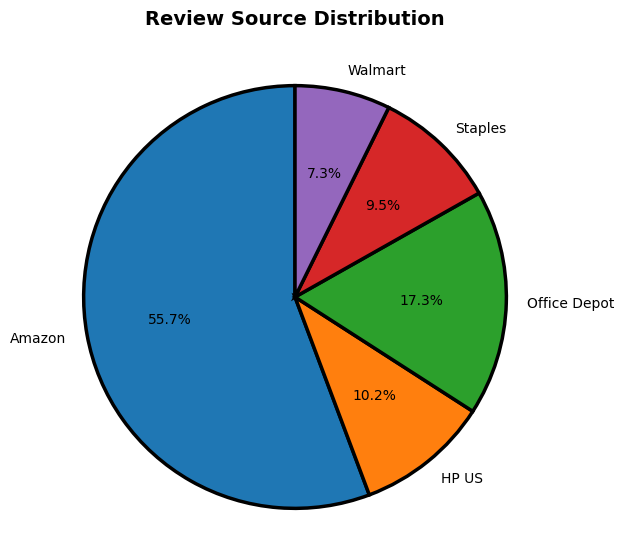

In [184]:
# Extract labels and values from the DataFrame
labels = reviewSource_df['Review Source']
sizes = reviewSource_df['LTR']

# Calculate the total n value
total_value = sum(sizes)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(edgecolor='black', linewidth = 2.5)  # Outline pie slices with black border
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title with the total n value, bold font, and higher position
plt.title(f"Review Source Distribution", 
          fontsize=14, fontweight='bold', pad=30)

# Display the pie chart
plt.show()

In [31]:
inkSupply_df = df2.groupby('Ink Supply Type').count().reset_index()
inkSupply_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/inkSupply.csv", index = False)
inkSupply_df

,Ink Supply Type,LTR,Star Rating,Review Source,Supplies Family,Printer Family,Combined Text,Month of Response Date,Age Range,Gender
0,Continuous Ink (Ink Tank),4272,0,0,4272,4272,4272,4272,2721,2714
1,Home-based Printer Ink,56914,16861,16861,56914,40053,56913,56914,21808,21768
2,Office Printer Ink,19302,5875,5875,19302,13427,19302,19302,7653,7632


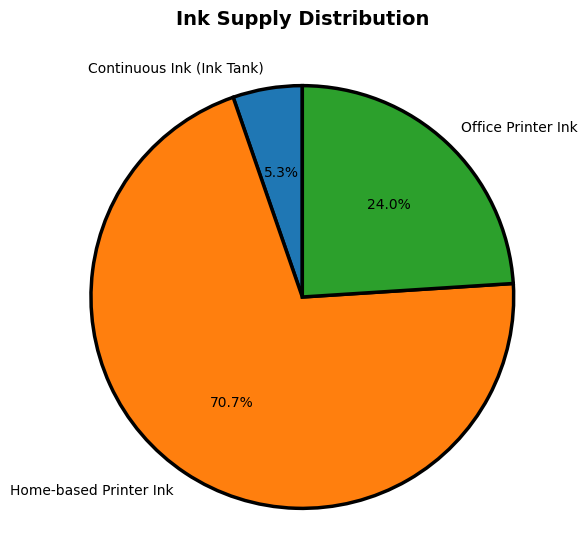

In [186]:
# Extract labels and values from the DataFrame
labels = inkSupply_df['Ink Supply Type']
sizes = inkSupply_df['LTR']

# Calculate the total n value
total_value = sum(sizes)

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(edgecolor='black', linewidth = 2.5)  # Outline pie slices with black border
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title with the total n value, bold font, and higher position
plt.title(f"Ink Supply Distribution", 
          fontsize=14, fontweight='bold', pad=30)

# Display the pie chart
plt.show()

In [32]:
df2['Supplies Family'] = df2['Supplies Family'].str.strip().str.title()
supplies_df = df2.groupby('Supplies Family').count().sort_values(ascending = False, by = 'Supplies Family').reset_index()
supplies_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/supplies.csv", index = False)
supplies_df

,Supplies Family,LTR,Star Rating,Review Source,Printer Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Supernesta,1131,651,651,480,1131,1089,1131,304,304
1,Sayan,2506,0,0,2506,2506,2376,2506,1599,1596
2,Rohan,379,379,379,0,379,379,379,0,0
3,Pyramid Refresh,2445,2432,2432,13,2445,2444,2445,9,9
4,Prohan,50,50,50,0,50,50,50,0,0
5,Poseidon,1351,0,0,1351,1351,1188,1351,860,860
6,Pluto Plus,348,0,0,348,348,345,348,229,228
7,Obelisk,36722,4388,4388,32334,36722,34055,36722,17539,17508
8,Nocturne,143,0,0,143,143,143,143,81,81
9,Nesta+,1089,1089,1089,0,1089,1089,1089,0,0


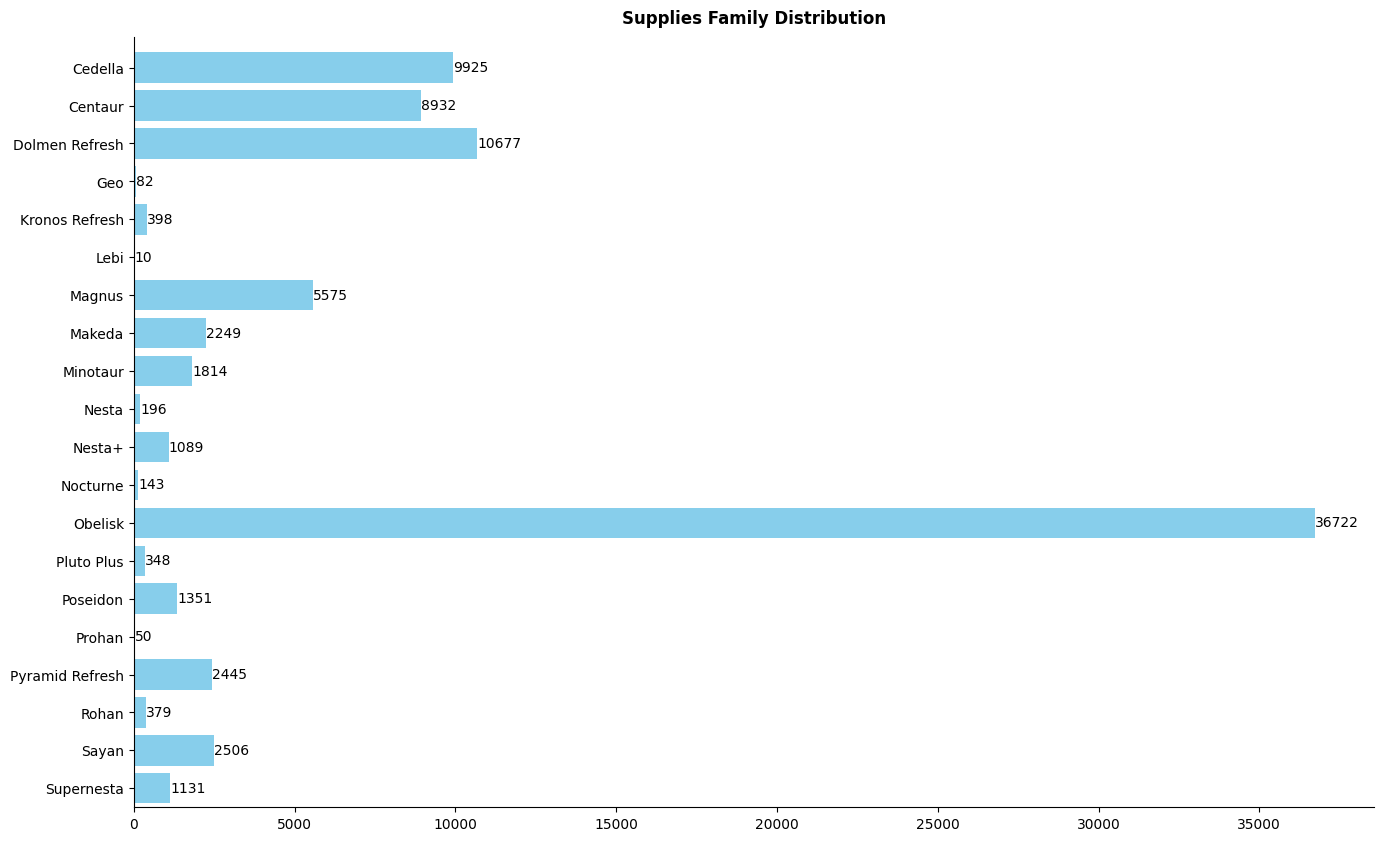

In [190]:
# Create horizontal bar chart
plt.figure(figsize=(16, 10))  # Set the figure size
ax = plt.barh(supplies_df['Supplies Family'], supplies_df['LTR'], color='skyblue')  # Create horizontal bars

# Add title
plt.title('Supplies Family Distribution', fontweight='bold', pad = 10)  # Title of the chart

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data values on top of each bar
for i in ax:
    plt.text(i.get_width(), i.get_y() + i.get_height()/2,  # Position the text
             str(i.get_width()),  # The value to display
             va='center',  # Center align vertically
             ha='left')  # Align the text to the left

# Adjust y-axis limits to remove gaps
plt.ylim(-0.5, len(supplies_df) - 0.2)  # Set limits to fit bars tightly

# Show the plot
plt.show()

In [33]:
df2['Printer Family'] = df2['Printer Family'].str.strip().str.title()
printer_df = df2.groupby('Printer Family').count().sort_values(ascending = False, by = 'Printer Family').reset_index()
printer_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/printer.csv", index = False)
printer_df

,Printer Family,LTR,Star Rating,Review Source,Supplies Family,Combined Text,Ink Supply Type,Month of Response Date,Age Range,Gender
0,Wudang Refresh,13,0,0,13,13,13,13,9,9
1,Wudang,5,0,0,5,5,4,5,2,2
2,Weber,201,0,0,201,201,189,201,116,116
3,Verona,1060,0,0,1060,1060,969,1060,567,563
4,Vasari Yeti,9196,0,0,9196,9196,8491,9196,5144,5130
5,Vasari,1481,0,0,1481,1481,1245,1481,789,787
6,Topaz,17,0,0,17,17,14,17,11,11
7,Tassel Yeti,184,0,0,184,184,184,184,106,106
8,Tassel,24,0,0,24,24,24,24,10,10
9,Taiji,773,0,0,773,773,708,773,412,412


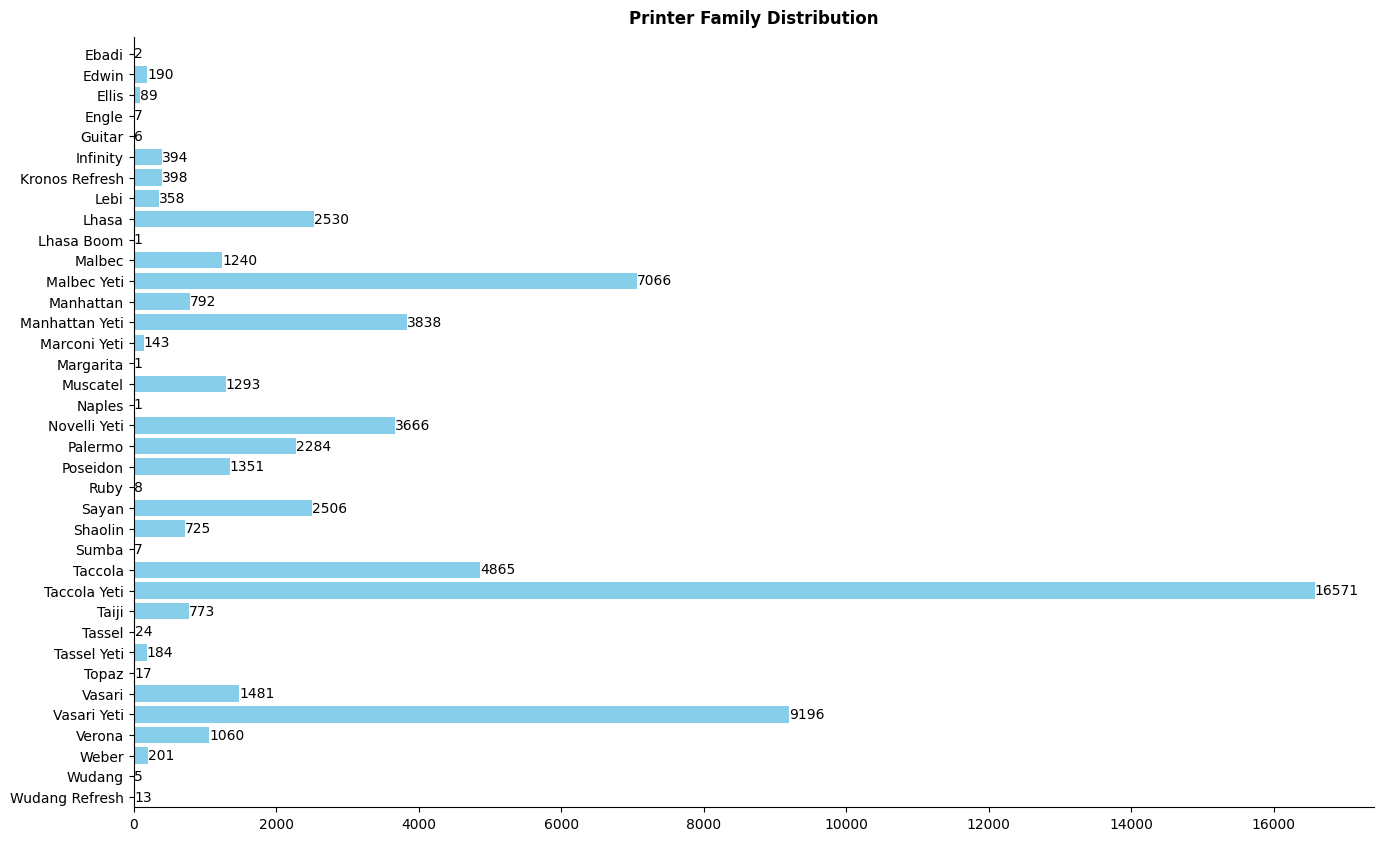

In [192]:
# Create horizontal bar chart
plt.figure(figsize=(16, 10))  # Set the figure size
ax = plt.barh(printer_df['Printer Family'], printer_df['LTR'], color='skyblue')  # Create horizontal bars

# Add title
plt.title('Printer Family Distribution', fontweight='bold', pad = 10)  # Title of the chart

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data values on top of each bar
for i in ax:
    plt.text(i.get_width(), i.get_y() + i.get_height()/2,  # Position the text
             str(i.get_width()),  # The value to display
             va='center',  # Center align vertically
             ha='left')  # Align the text to the left

# Adjust y-axis limits to remove gaps
plt.ylim(-0.5, len(printer_df) - 0.2)  # Set limits to fit bars tightly

# Show the plot
plt.show()

In [34]:
ageGender_df = df2[(df2['Age Range'].notnull()) & (df2['Gender'].notnull())][['Age Range', 'Gender']].reset_index(drop = True)
ageGender_df = ageGender_df[((ageGender_df.Gender == 'Male') | (ageGender_df.Gender == 'Female')) & (~(ageGender_df['Age Range'] == 'Prefer not to answer'))]
ageGender_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/ageGender.csv", index = False)
ageGender_df

,Age Range,Gender
0,35-50 years,Male
1,51-65 years,Female
2,25-34 years,Male
3,Over 65 years,Female
4,Over 65 years,Male
...,...,...
35279,35-50 years,Female
35280,Over 65 years,Male
35281,35-50 years,Female
35282,51-65 years,Female


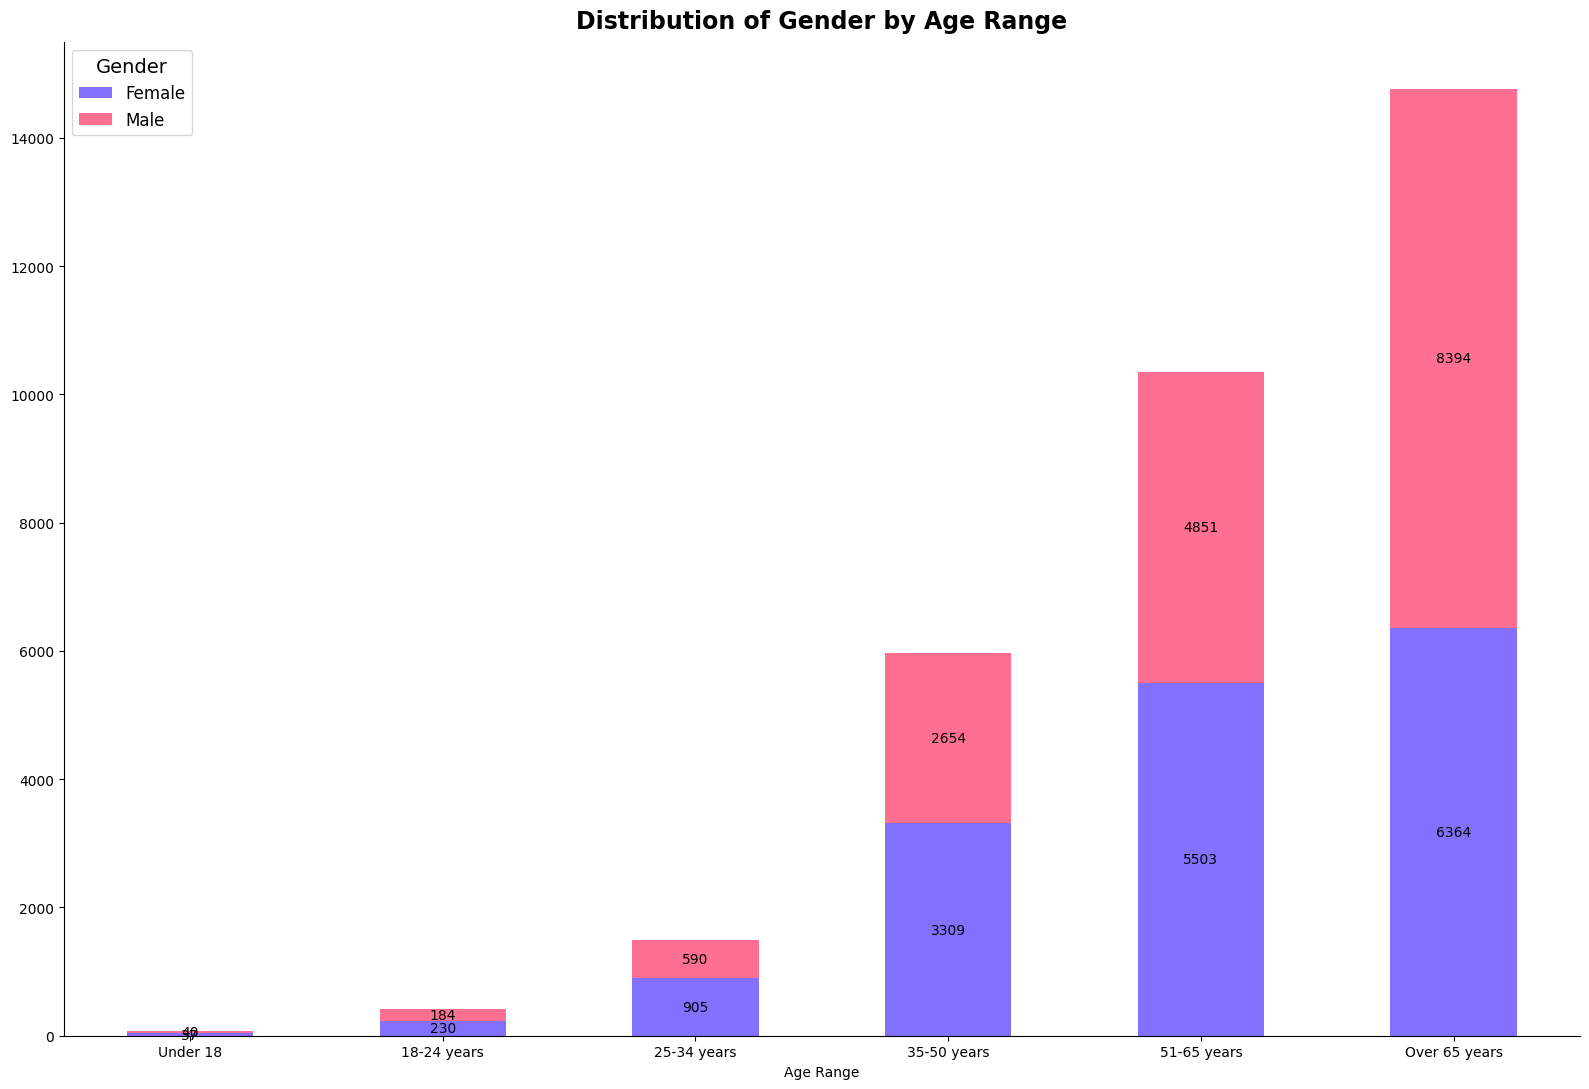

In [194]:
# Define the custom order for age ranges
age_order = ['Under 18', '18-24 years', '25-34 years', '35-50 years', '51-65 years', 'Over 65 years']

# Count occurrences of each Gender for each Age Range
age_gender_counts = ageGender_df.groupby(['Age Range', 'Gender']).size().unstack(fill_value=0)

# Reindex to ensure all categories are included
age_gender_counts = age_gender_counts.reindex(age_order, fill_value=0)

# Convert 'Age Range' to categorical with specified order
age_gender_counts.index = pd.CategoricalIndex(age_gender_counts.index, categories=age_order, ordered=True)

# Create the stacked bar chart
colors = ['#8470FF', '#FF6F91']  # Light blue and bright pink
ax = age_gender_counts.plot(kind='bar', stacked=True, figsize=(16, 11), color=colors)

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)  # Get current Axes and remove spines

# Add data labels in each bar segment
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y() + height / 2  # Center label vertically within segment
    ax.text(x + width / 2, y, f"{height:.0f}", ha='center', va='center', color='black', fontsize=10)

# Add labels and title
# plt.ylabel('Count')
# plt.xlabel('Age Range')
plt.title('Distribution of Gender by Age Range', fontweight='bold', fontsize=17, pad=10)  # Increase font size for title
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Gender', fontsize=12, title_fontsize='14')  # Increase font size for legend and title

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

In [35]:
df2.loc[df2['LTR'] >= 6, 'LTR_binary'] = 'Positive' 
df2.loc[df2['LTR'] < 6, 'LTR_binary'] = 'Negative'

sentimentTime_df = df2[['LTR_binary', 'Month of Response Date']]
sentimentTime_df.to_csv("C:/Users/Michael/Documents/GitHub/InkSightAnalyzer/Sandbox/streamlitProcessing/generatedCSVs/sentimentTime.csv", index = False)
sentimentTime_df

,LTR_binary,Month of Response Date
0,Positive,2023-06-01
1,Positive,2023-06-01
2,Negative,2023-06-01
3,Positive,2023-06-01
4,Positive,2023-06-01
...,...,...
163448,Negative,2024-03-01
163449,Negative,2024-03-01
163455,Negative,2024-03-01
163526,Negative,2023-11-01


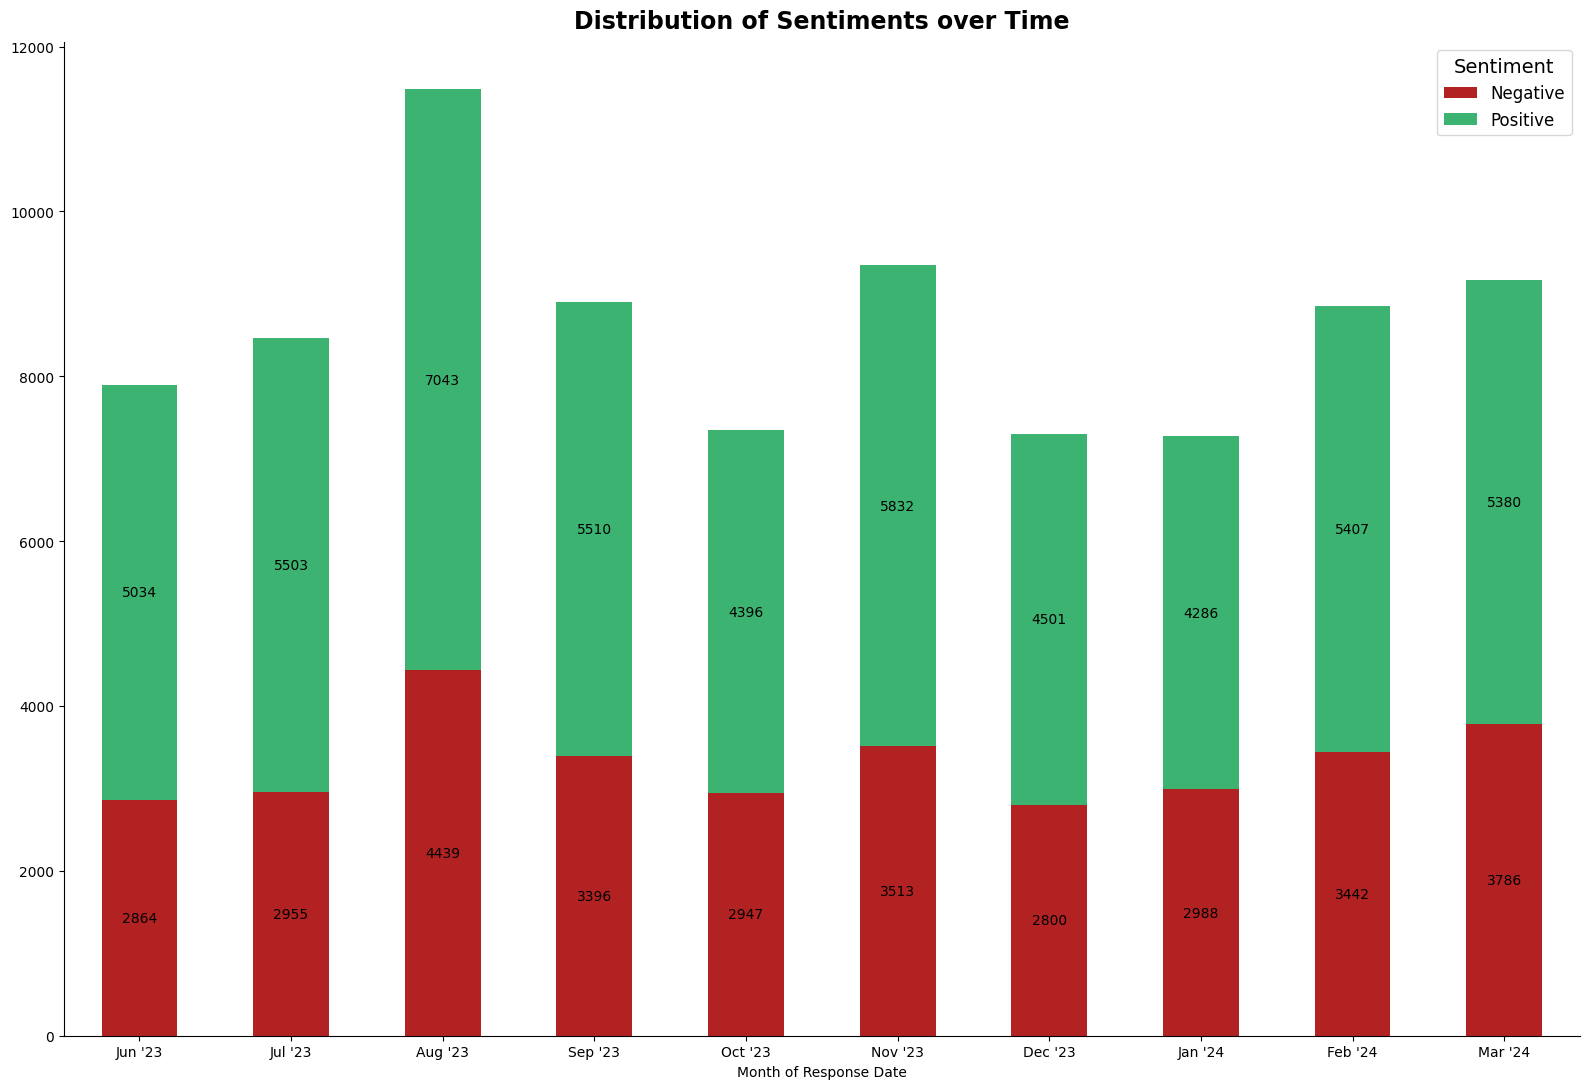

In [219]:
# Count occurrences
time_Sentiment_counts = sentimentTime_df.groupby(['Month of Response Date', 'LTR_binary']).size().unstack(fill_value=0)

# Format month index
time_Sentiment_counts.index = pd.to_datetime(time_Sentiment_counts.index).strftime("%b '%y")

# Create the stacked bar chart
colors = ['#B22222', '#3CB371']  # red and green
ax = time_Sentiment_counts.plot(kind='bar', stacked=True, figsize=(16, 11), color=colors)

# Remove right and top spines
plt.gca().spines[['right', 'top']].set_visible(False)

# Add data labels in each bar segment
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y() + height / 2  # Center label vertically within segment
    ax.text(x + width / 2, y, f"{height:.0f}", ha='center', va='center', color='black', fontsize=10)

# Add labels and title
plt.title('Distribution of Sentiments over Time', fontweight='bold', fontsize=17, pad=10)  # Increase font size for title
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Sentiment', fontsize=12, title_fontsize='14')  # Increase font size for legend and title

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()